In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers_path = "C:\E\data_analytics\Customers.csv"
products_path = "C:\E\data_analytics\Products.csv"
transactions_path = "C:\E\data_analytics\Transactions.csv"

In [6]:
customers = pd.read_csv(customers_path)
products = pd.read_csv(products_path)
transactions = pd.read_csv(transactions_path)

In [7]:
customers_head = customers.head()
products_head = products.head()
transactions_head = transactions.head()

In [8]:
customers_nulls = customers.isnull().sum()
products_nulls = products.isnull().sum()
transactions_nulls = transactions.isnull().sum()

In [9]:
customers_duplicates = customers.duplicated().sum()
products_duplicates = products.duplicated().sum()
transactions_duplicates = transactions.duplicated().sum()

In [12]:
customers_head


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [14]:
customers_info = customers.info()
products_info = products.info()
transactions_info = transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  


In [16]:
# Convert date columns to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Add useful features
customers['SignupYear'] = customers['SignupDate'].dt.year
transactions['TransactionMonth'] = transactions['TransactionDate'].dt.to_period('M')

# Merge datasets
merged_data = transactions.merge(customers, on="CustomerID", how="left") \
                          .merge(products, on="ProductID", how="left")

# Rename duplicate columns for clarity
merged_data.rename(columns={
    'Price_x': 'TransactionPrice',
    'Price_y': 'ProductPrice'
}, inplace=True)



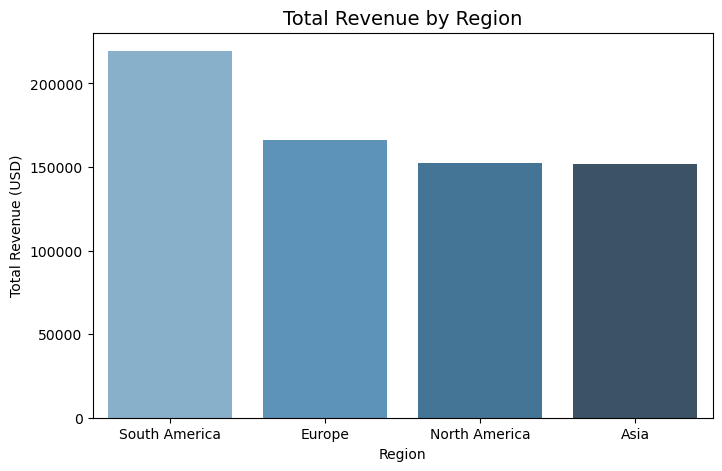

In [17]:
# Total Revenue by Region
region_revenue = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=region_revenue.index, y=region_revenue.values, palette="Blues_d")
plt.title("Total Revenue by Region", fontsize=14)
plt.xlabel("Region")
plt.ylabel("Total Revenue (USD)")
plt.show()


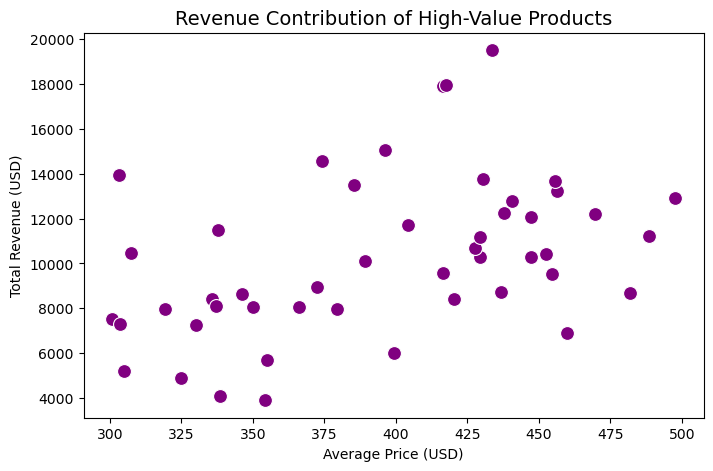

In [18]:
# Revenue Contribution of High-Value Products
product_price_revenue = merged_data.groupby('ProductID').agg({'ProductPrice': 'mean', 'TotalValue': 'sum'})
high_value_products = product_price_revenue[product_price_revenue['ProductPrice'] > 300]
plt.figure(figsize=(8, 5))
sns.scatterplot(x='ProductPrice', y='TotalValue', data=high_value_products, color='purple', s=100)
plt.title("Revenue Contribution of High-Value Products", fontsize=14)
plt.xlabel("Average Price (USD)")
plt.ylabel("Total Revenue (USD)")
plt.show()


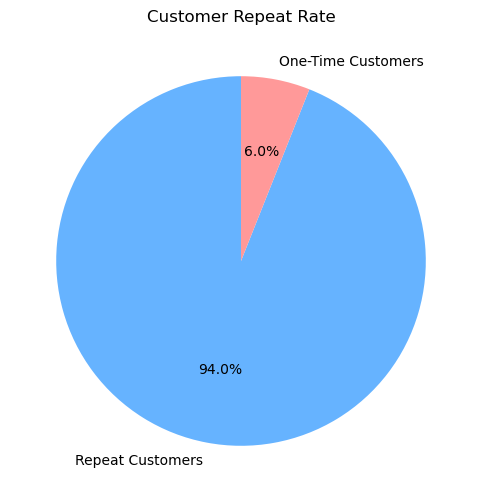

In [19]:
# Customer Repeat Rate
customer_transactions = merged_data.groupby('CustomerID')['TransactionID'].count()
repeat_customers = customer_transactions[customer_transactions > 1].count()
total_customers = customer_transactions.count()
plt.figure(figsize=(6, 6))
plt.pie([repeat_customers, total_customers - repeat_customers], labels=["Repeat Customers", "One-Time Customers"],
        autopct="%1.1f%%", startangle=90, colors=["#66b3ff", "#ff9999"])
plt.title("Customer Repeat Rate")
plt.show()


C:\Users\ayush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ayush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


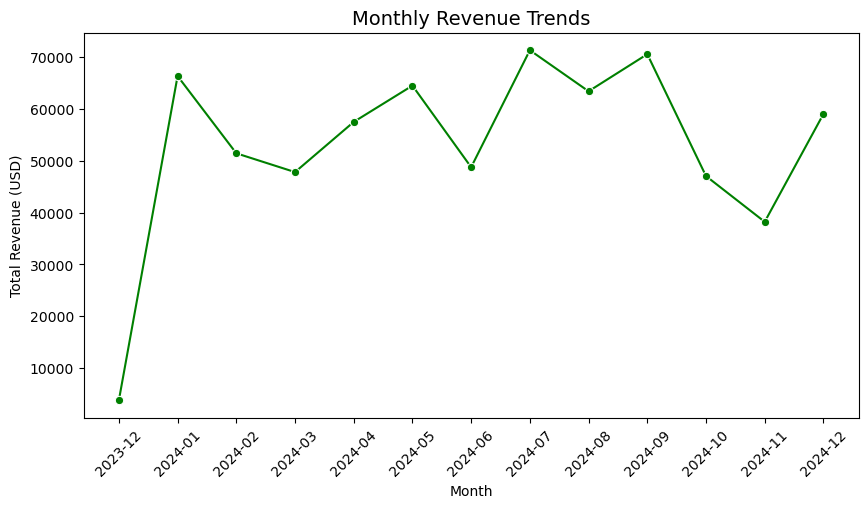

In [20]:
# Monthly Revenue Trends
monthly_transactions = merged_data.groupby('TransactionMonth')['TotalValue'].sum()
plt.figure(figsize=(10, 5))
monthly_transactions.index = monthly_transactions.index.astype(str)
sns.lineplot(x=monthly_transactions.index, y=monthly_transactions.values, marker="o", color='green')
plt.title("Monthly Revenue Trends", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Total Revenue (USD)")
plt.xticks(rotation=45)
plt.show()


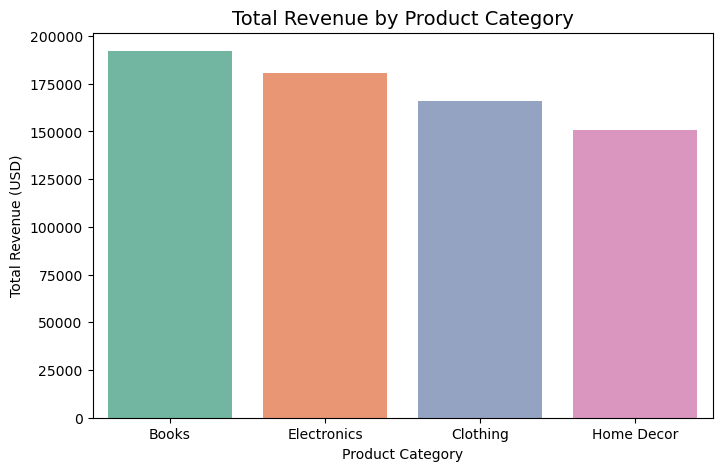

In [22]:
# Total Revenue by Product Category
category_revenue = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=category_revenue.index, y=category_revenue.values, palette="Set2")
plt.title("Total Revenue by Product Category", fontsize=14)
plt.xlabel("Product Category")
plt.ylabel("Total Revenue (USD)")
plt.show()